In [116]:
import numpy as np
import pandas as pd
# import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# import module to calculate model perfomance metrics
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [118]:
column=['TV', 'Radio', 'Newspaper' , 'Sales']

In [119]:
df2 = df [column]
df2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [120]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [121]:
df2.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


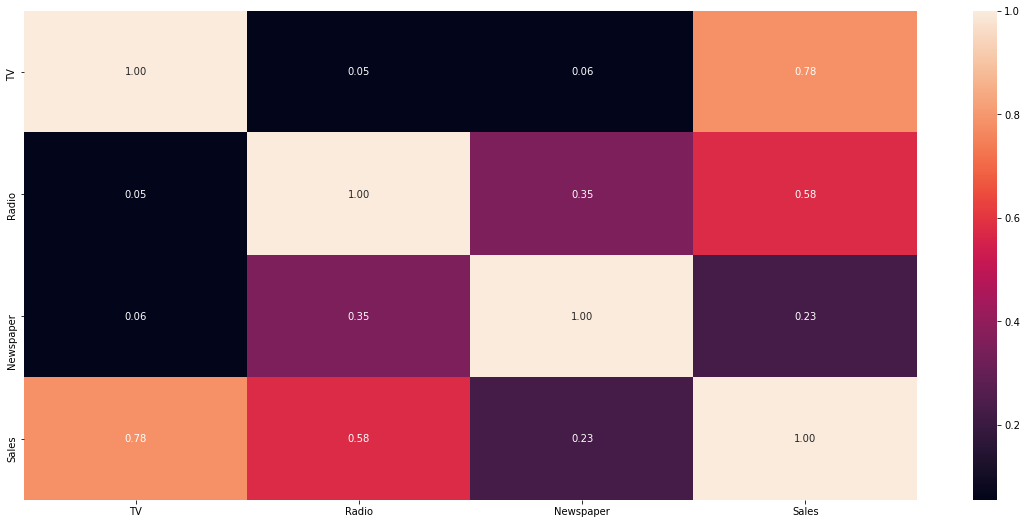

In [122]:
corr = df2.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

In [123]:
# crear una lista de nombres de funciones
feature_names = ['TV', 'Newspaper', 'Radio']

# use la lista para seleccionar un subconjunto del DataFrame original
X = df2[feature_names]

# sales
y = df2.Sales

# Dividir X e Y en juegos de entrenamiento y prueba 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

# Modelo
linreg = LinearRegression()

# ajustar el modelo a los datos de entrenamiento 
linreg.fit(X_train, y_train)


# hacer predicciones en el conjunto de prueba
y_pred = linreg.predict(X_test)

In [124]:
print('Variance score = %.2f' % metrics.r2_score(y_test, y_pred))

Variance score = 0.89


In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

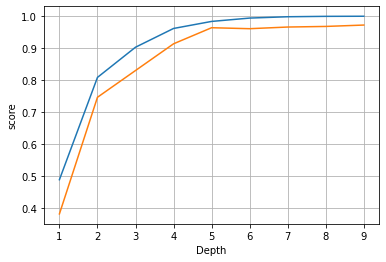

In [130]:
scoretrain, scoretest, param_Depth = [], [], []
for Depth in np.arange(1, 10):
    tree_rgs = DecisionTreeRegressor(max_depth=Depth)
    tree_rgs.fit(X_train, y_train)
    score_train = tree_rgs.score(X_train, y_train)
    score_test = tree_rgs.score(X_test, y_test)
    scoretrain.append(score_train)
    scoretest.append(score_test)
    param_Depth.append(Depth)


plt.plot(param_Depth, scoretrain)
plt.plot(param_Depth, scoretest)
plt.ylabel('score')
plt.xlabel('Depth')
plt.grid()
plt.show()

In [131]:
tree_rgs = DecisionTreeRegressor(max_depth=7)
tree_rgs.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred_train = tree_rgs.predict(X_train)

y_pred = tree_rgs.predict(X_test)
print('Variance score = %.2f' % metrics.r2_score(y_test, y_pred))

Variance score = 0.97
